In [26]:
import pandas as pd
import sklearn as sk
import time
import numpy as np
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import matplotlib.pyplot as plt
#%pylab inline
#%%

t1 = time.time()
print('Loading database ...')
df = pd.read_hdf('../database/all_data_comp.h5','table')
print('Time to load database:', time.time()-t1)
#%%

# Variable names.
import var_names
d = var_names.d

Loading database ...
Time to load database: 13.536941289901733


In [120]:


feat = pd.read_excel('training_setup.xlsx',index_col='test_no')

# Create a list of features for each test. A list which will contain a list of features for each row. This list
# will be used for the training.

test_features = list()


for i in range(30):
    
    tmp_l = list()
    
    if feat.iloc[i][0] == 1:
        #print('ett')
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 2:
        #print('två')
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 3:
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(9,13):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 4:
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(9,13):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(13,17):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
    
    test_features.append(tmp_l)

# And then at last add the corresponding predictor to each test set.


for i in range(len(test_features)):
    if 'AE1' in test_features[i][0]:
        test_features[i].append(d['fo_booster_13'])
    if 'AE2' in test_features[i][0]:

        test_features[i].append(d['fo_booster_24'])

Test: 1 ae1_rpm
Test: 1 ae3_rpm
Test: 1 me1_rpm
Test: 1 me3_rpm
Test: 2 ae1_frp
Test: 2 ae3_frp
Test: 2 me1_frp
Test: 2 me3_frp
Test: 3 ae1_exh_T
Test: 3 ae3_exh_T
Test: 3 me1_exh_T
Test: 3 me3_exh_T
Test: 4 ae1_TC_rpm
Test: 4 ae3_TC_rpm
Test: 4 me1_TC_rpm
Test: 4 me3_TC_rpm
Test: 5 ae1_rpm
Test: 5 ae3_rpm
Test: 5 me1_rpm
Test: 5 me3_rpm
Test: 5 ae1_frp
Test: 5 ae3_frp
Test: 5 me1_frp
Test: 5 me3_frp
Test: 6 ae1_rpm
Test: 6 ae3_rpm
Test: 6 me1_rpm
Test: 6 me3_rpm
Test: 6 ae1_exh_T
Test: 6 ae3_exh_T
Test: 6 me1_exh_T
Test: 6 me3_exh_T
Test: 7 ae1_rpm
Test: 7 ae3_rpm
Test: 7 me1_rpm
Test: 7 me3_rpm
Test: 7 ae1_TC_rpm
Test: 7 ae3_TC_rpm
Test: 7 me1_TC_rpm
Test: 7 me3_TC_rpm
Test: 8 ae1_frp
Test: 8 ae3_frp
Test: 8 me1_frp
Test: 8 me3_frp
Test: 8 ae1_exh_T
Test: 8 ae3_exh_T
Test: 8 me1_exh_T
Test: 8 me3_exh_T
Test: 9 ae1_frp
Test: 9 ae3_frp
Test: 9 me1_frp
Test: 9 me3_frp
Test: 9 ae1_TC_rpm
Test: 9 ae3_TC_rpm
Test: 9 me1_TC_rpm
Test: 9 me3_TC_rpm
Test: 10 ae1_exh_T
Test: 10 ae3_exh_T
Test: 

In [121]:

# We are going to use test 14 and 29. Where are features are represented. The above code is from a previous paper
# I just reused it here for convience.

test_1 = test_features[14]
test_2 = test_features[29]


In [122]:
df[test_1].dropna()

,AE1 ENG SPEED:1745:RPM:Average:900,AE3 ENG SPEED:3745:RPM:Average:900,ME1 ENGINE SPEED:1364:rpm:Average:900,ME3 ENGINE SPEED:3364:rpm:Average:900,AE1 FUEL RACK POSIT:1742:mm:Average:900,AE3 FUEL RACK POSIT:3742:mm:Average:900,ME1 FUEL RACK POSIT:10005:%:Average:900,ME3 FUEL RACK POSIT:30005:%:Average:900,AE1 EXH MEAN VALUE:1591: C:Average:900,AE3 EXH MEAN VALUE:3591: C:Average:900,ME1 EXH GAS MEAN:1125:C:Average:900,ME3 EXH GAS MEAN:3125:C:Average:900,AE1 TC SPEED:1748:RPM:Average:900,AE3 TC SPEED:3748:RPM:Average:900,ME1 T/C SPEED:10006:rpm:Average:900,ME3 T/C SPEED:30006:rpm:Average:900,FO BOOST 1 CONSUMPT:6165:m3/h:Average:900
Time,,,,,,,,,,,,,,,,,
2013-12-01 00:00:00,750.400000,0.000000,0.000000,0.476191,27.666667,1.000000,0.000000,0.000000,391.666667,79.200000,83.359385,73.281240,20953.066667,0.000000,29.304029,29.304029,0.000000
2013-12-01 00:15:00,750.600000,0.000000,0.000000,0.476191,28.066667,1.000000,0.000000,0.000000,392.666667,76.666667,80.586898,71.659750,21009.066667,0.000000,29.304029,29.304029,0.000000
2013-12-01 00:30:00,751.733333,0.000000,0.000000,0.476191,28.066667,1.000000,0.000000,0.000000,392.533333,72.133333,76.055354,68.525847,21078.000000,0.000000,29.304029,29.304029,0.000000
2013-12-01 00:45:00,750.666667,0.000000,0.000000,0.476191,27.266667,1.000000,0.000000,0.000000,390.400000,70.000000,72.204315,65.885229,20794.466667,0.000000,29.304029,29.304029,0.000000
2013-12-01 01:00:00,752.000000,0.000000,0.000000,0.476191,27.000000,1.000000,0.000000,0.000000,388.600000,69.133333,70.622714,64.824586,20620.266667,0.000000,29.304029,29.792430,0.000000
2013-12-01 01:15:00,749.533333,0.000000,0.000000,0.476191,27.066667,1.000000,0.000000,0.000000,388.733333,68.600000,69.202282,63.737894,20617.066667,0.000000,29.304029,29.304029,0.000000
2013-12-01 01:30:00,751.866667,0.000000,0.000000,0.476191,26.866667,1.000000,0.000000,0.000000,388.600000,68.000000,68.140011,62.932033,20555.866667,0.000000,29.304029,29.304029,0.000000
2013-12-01 01:45:00,750.333333,0.000000,0.000000,0.476191,26.933333,1.000000,0.000000,0.000000,388.800000,68.000000,67.700450,62.625969,20600.266667,0.000000,29.304029,29.304029,0.000000
2013-12-01 02:00:00,750.533333,0.000000,0.000000,0.476191,26.866667,1.000000,0.000000,0.000000,387.600000,68.000000,67.300777,62.223853,20586.800000,0.000000,29.304029,29.792430,0.000000


In [123]:
df_day = pd.DataFrame()

# The values are stored in 15-min interval, so if we want to sum them first multiply by the interval.
# Divide by 60 min, as we have summed minutes with m3/h data. So we get m3/min (which are then summed for the day)
# fo_total


df_day['fo_tot_booster_13'] = df[d['fo_booster_13']].resample('1D').sum()*15/60
df_day['fo_tot_booster_24'] = df[d['fo_booster_24']].resample('1D').sum()*15/60

df_day['fo_av_booster_13'] = df[d['fo_booster_13']].resample('1D').mean()
df_day['fo_av_booster_24'] = df[d['fo_booster_24']].resample('1D').mean()

df_day['fo_tot_massflow_13'] = df['FO_day_engine_1_3']
df_day['fo_tot_massflow_24'] = df['FO_day_engine_2_4']

df_day = df_day.dropna()

In [124]:
df_day['fact_13'] = df_day['fo_tot_massflow_13']/df_day['fo_tot_booster_13']
df_day['fact_24'] = df_day['fo_tot_massflow_24']/df_day['fo_tot_booster_24']

In [125]:
df_day['fact_24'].describe()

count    319.000000
mean       0.994098
std        0.032289
min        0.649660
25%        0.989044
50%        0.994568
75%        0.999505
max        1.370472
Name: fact_24, dtype: float64

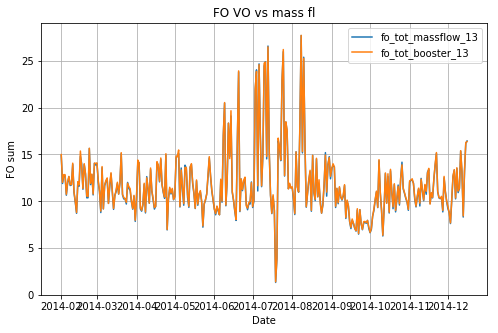

In [34]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
#plt.plot(m_linear.predict(X)[100:400],label=' linear predict ')

dates = '2014'

plt.plot(df_day['fo_tot_massflow_13'][dates])
plt.plot(df_day['fo_tot_booster_13'][dates])
#plt.plot(m_tpot.predict(X)[100:400],label=' tpot predict ')

#plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Date', ylabel='FO sum',title='FO VO vs mass fl')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
#plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
#fig.savefig(results_folder + date1 + "tpot_10gen_diff.png",dpi=1200)

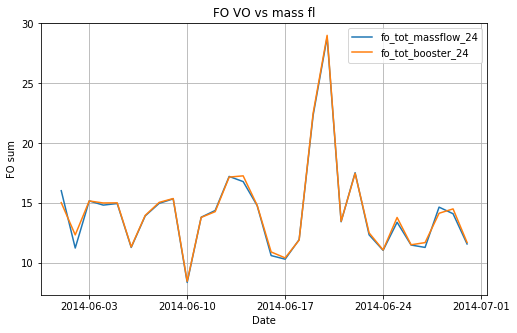

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
#plt.plot(m_linear.predict(X)[100:400],label=' linear predict ')

dates = '2014-06'

plt.plot(df_day['fo_tot_massflow_24'][dates])
plt.plot(df_day['fo_tot_booster_24'][dates])
#plt.plot(m_tpot.predict(X)[100:400],label=' tpot predict ')

#plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Date', ylabel='FO sum',title='FO VO vs mass fl')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
#plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
#fig.savefig(results_folder + date1 + "tpot_10gen_diff.png",dpi=1200)

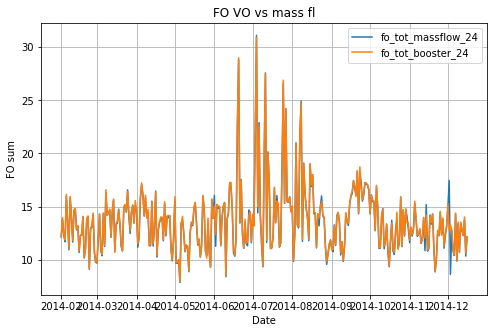

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
#plt.plot(m_linear.predict(X)[100:400],label=' linear predict ')

dates = '2014'

plt.plot(df_day['fo_tot_massflow_24'][dates])
plt.plot(df_day['fo_tot_booster_24'][dates])
#plt.plot(m_tpot.predict(X)[100:400],label=' tpot predict ')

#plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Date', ylabel='FO sum',title='FO VO vs mass fl')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
#plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
#fig.savefig(results_folder + date1 + "tpot_10gen_diff.png",dpi=1200)

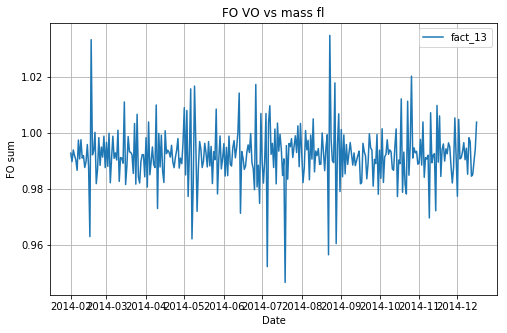

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
#plt.plot(m_linear.predict(X)[100:400],label=' linear predict ')

dates = '2014'

plt.plot(df_day['fact_13'][dates])
#plt.plot(df_day['fact_24'][dates])
#plt.plot(m_tpot.predict(X)[100:400],label=' tpot predict ')

#plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Date', ylabel='FO sum',title='FO VO vs mass fl')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
#plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
#fig.savefig(results_folder + date1 + "tpot_10gen_diff.png",dpi=1200)

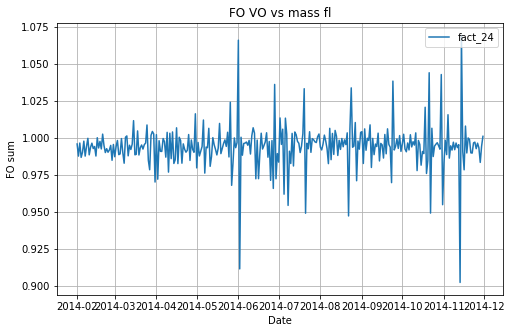

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
#plt.plot(m_linear.predict(X)[100:400],label=' linear predict ')

date1 = '2014-01'
date2 = '2014-11'
#dates = 

#plt.plot(df_day['fact_13'][dates])
plt.plot(df_day['fact_24'][date1:date2])
#plt.plot(m_tpot.predict(X)[100:400],label=' tpot predict ')

#plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Date', ylabel='FO sum',title='FO VO vs mass fl')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
#plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
#fig.savefig(results_folder + date1 + "tpot_10gen_diff.png",dpi=1200)

In [39]:

df_day['fact_13'].describe()

count    319.000000
mean       0.992145
std        0.009963
min        0.946711
25%        0.987809
50%        0.992116
75%        0.996516
max        1.034909
Name: fact_13, dtype: float64

In [40]:
df_day['fact_24'].describe()

count    319.000000
mean       0.994098
std        0.032289
min        0.649660
25%        0.989044
50%        0.994568
75%        0.999505
max        1.370472
Name: fact_24, dtype: float64

In [15]:
# We can see that the mass flow and volume flow meters are not the same for both fuel lines. Not sure what we can do
# about this other than conclude that the volume flow meters are within some sort of error margin of the mass flow.
# So in this study we are going to use the volume flow meters both as totals and then also as testing for the data.


In [126]:
df_day

,fo_tot_booster_13,fo_tot_booster_24,fo_av_booster_13,fo_av_booster_24,fo_tot_massflow_13,fo_tot_massflow_24,fact_13,fact_24
Time,,,,,,,,
2014-02-01,14.987106,12.201239,0.624463,0.508385,14.88,12.15,0.992853,0.995800
2014-02-02,12.031982,13.973163,0.501333,0.582215,11.91,13.80,0.989862,0.987607
2014-02-03,12.857220,12.343792,0.535718,0.514325,12.78,12.30,0.993994,0.996452
2014-02-04,12.843106,11.847068,0.535129,0.493628,12.74,11.69,0.991972,0.986742
2014-02-05,10.763068,16.158649,0.448461,0.673277,10.66,16.00,0.990424,0.990182
2014-02-06,12.100592,13.701239,0.504191,0.570885,11.94,13.67,0.986729,0.997720
2014-02-07,12.661182,11.087372,0.527549,0.461974,12.63,10.95,0.997537,0.987610
2014-02-08,11.798420,15.943278,0.491601,0.664303,11.69,15.85,0.990811,0.994149
2014-02-09,11.787620,14.025049,0.491151,0.584377,11.76,14.02,0.997657,0.999640


In [132]:

# Train a model with the data from the resampled dataset.

from sklearn.externals import joblib
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

cores = -1
seed = 42
gen = 10

In [145]:
df_train_1d = pd.DataFrame()

df_train_1d = df[test_1].resample('1D').mean().dropna()
#df_train_1d['fo_av_booster_13'] = df_day['fo_av_booster_13']
df_train_1d = df_train.dropna()

In [146]:
df_train_1d

,AE1 ENG SPEED:1745:RPM:Average:900,AE3 ENG SPEED:3745:RPM:Average:900,ME1 ENGINE SPEED:1364:rpm:Average:900,ME3 ENGINE SPEED:3364:rpm:Average:900,AE1 FUEL RACK POSIT:1742:mm:Average:900,AE3 FUEL RACK POSIT:3742:mm:Average:900,ME1 FUEL RACK POSIT:10005:%:Average:900,ME3 FUEL RACK POSIT:30005:%:Average:900,AE1 EXH MEAN VALUE:1591: C:Average:900,AE3 EXH MEAN VALUE:3591: C:Average:900,ME1 EXH GAS MEAN:1125:C:Average:900,ME3 EXH GAS MEAN:3125:C:Average:900,AE1 TC SPEED:1748:RPM:Average:900,AE3 TC SPEED:3748:RPM:Average:900,ME1 T/C SPEED:10006:rpm:Average:900,ME3 T/C SPEED:30006:rpm:Average:900,FO BOOST 1 CONSUMPT:6165:m3/h:Average:900,fo_av_booster_13
Time,,,,,,,,,,,,,,,,,,
2014-02-01,642.322222,126.810417,0.000000,253.288699,18.741667,5.452083,0.000000,24.248697,331.825694,130.720833,79.565064,302.428415,15031.242361,2890.379861,29.304029,8308.363901,0.624463,0.624463
2014-02-02,474.695139,114.620139,231.820775,0.434634,12.636111,5.101389,22.417944,0.000000,260.498611,123.305556,286.755167,72.809611,10305.982639,2709.517361,8249.160618,29.334554,0.501333,0.501333
2014-02-03,487.011111,121.029861,0.000000,246.564382,15.278472,5.016667,2.876495,21.269801,268.643750,123.304167,73.995899,299.070051,11795.482639,2661.127778,29.304029,7794.210460,0.535718,0.535718
2014-02-04,586.199306,119.561111,234.511141,11.241402,15.404861,5.038194,19.602873,0.852431,300.034028,124.519444,287.826130,83.869297,12511.573611,2609.691667,7978.688481,347.054336,0.535129,0.535129
2014-02-05,364.860417,98.083333,2.663029,255.880300,7.812500,4.328472,0.186401,23.159663,211.575000,111.799306,72.695542,302.365168,6872.304167,2174.252778,73.076923,8394.317320,0.448461,0.448461
2014-02-06,487.470139,105.382639,240.735017,1.433862,12.130556,4.581250,22.646514,0.016491,263.142361,122.972222,292.094411,79.130896,10142.315972,2339.203472,8784.671395,41.992268,0.504191,0.504191
2014-02-07,614.875694,109.391667,5.830357,225.965065,17.211806,4.863889,3.380403,18.031338,317.214583,122.977778,81.831734,279.902476,13902.131250,2524.114583,165.557592,6921.784736,0.527549,0.527549
2014-02-08,415.923611,119.738889,0.000000,274.890442,10.197222,5.154167,0.000000,24.071446,234.433333,123.947222,71.928600,322.743900,8375.615278,2704.010417,29.344729,8943.136997,0.491601,0.491601
2014-02-09,464.288194,107.571528,248.046084,4.555445,11.858333,4.998611,21.372072,0.180463,254.193750,119.043750,298.744170,75.851338,9820.613194,2582.060417,8728.077968,115.811967,0.491151,0.491151


In [147]:

df_out = pd.DataFrame()
df_test = df_train_1d

print(list(df_test))
# drop the last column, which is the measured
X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
# y is the measured value
print('Label: ',df_test.columns[len(df_test.columns)-1] )
y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])


# make a test and train split.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=seed)

# 

print('Test number, linear model: ')
m_linear = sk.linear_model.LinearRegression(n_jobs=cores)
m_linear.fit(X_train, y_train.reshape(-1,))

m_tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
m_tpot.fit(X_train, y_train.reshape(-1,))

df_out['tpot_test_no_'+str(test_no)] = m_tpot.predict(X)
    
MSE = mean_squared_error(m_tpot.predict(X_test),y_test)
MSE_perc = mean_squared_error(m_tpot.predict(X_test),y_test)/max(y_test)
R_2 = r2_score(m_tpot.predict(X_test),y_test)

print('MSE: ',MSE )
print('MSE %: ',MSE_perc )
print('R2 score:', R_2)

df_out['linear_test_no_'+str(test_no)] = m_linear.predict(X)

score = m_linear.score(X_test,y_test)
score_perc = m_linear.score(X_test,y_test)/max(y_test)
print('Score: ',score )
print('Score in % of max: ',score_perc )



['AE1 ENG SPEED:1745:RPM:Average:900', 'AE3 ENG SPEED:3745:RPM:Average:900', 'ME1 ENGINE SPEED:1364:rpm:Average:900', 'ME3 ENGINE SPEED:3364:rpm:Average:900', 'AE1 FUEL RACK POSIT:1742:mm:Average:900', 'AE3 FUEL RACK POSIT:3742:mm:Average:900', 'ME1 FUEL RACK POSIT:10005:%:Average:900', 'ME3 FUEL RACK POSIT:30005:%:Average:900', 'AE1 EXH MEAN VALUE:1591:  C:Average:900', 'AE3 EXH MEAN VALUE:3591:  C:Average:900', 'ME1 EXH GAS MEAN:1125:C:Average:900', 'ME3 EXH GAS MEAN:3125:C:Average:900', 'AE1 TC SPEED:1748:RPM:Average:900', 'AE3 TC SPEED:3748:RPM:Average:900', 'ME1 T/C SPEED:10006:rpm:Average:900', 'ME3 T/C SPEED:30006:rpm:Average:900', 'FO BOOST 1 CONSUMPT:6165:m3/h:Average:900', 'fo_av_booster_13']
Label:  fo_av_booster_13
Test number, linear model: 


Optimization Progress:  18%|█▊        | 100/550 [00:10<03:55,  1.91pipeline/s]

Generation 1 - Current best internal CV score: -1.1809349258995615e-32


Optimization Progress:  27%|██▋       | 150/550 [00:19<03:01,  2.21pipeline/s]

Generation 2 - Current best internal CV score: -1.1809349258995615e-32


Optimization Progress:  36%|███▋      | 200/550 [00:26<02:25,  2.41pipeline/s]

Generation 3 - Current best internal CV score: -1.1809349258995615e-32


Optimization Progress:  45%|████▌     | 250/550 [00:35<02:58,  1.68pipeline/s]

Generation 4 - Current best internal CV score: -8.788282679564659e-33


Optimization Progress:  55%|█████▍    | 300/550 [00:50<03:53,  1.07pipeline/s]

Generation 5 - Current best internal CV score: -5.030075854752545e-33


Optimization Progress:  64%|██████▎   | 350/550 [00:57<02:22,  1.40pipeline/s]

Generation 6 - Current best internal CV score: -5.030075854752545e-33


Optimization Progress:  73%|███████▎  | 400/550 [01:07<01:47,  1.39pipeline/s]

Generation 7 - Current best internal CV score: -3.906239087204229e-33


Optimization Progress:  82%|████████▏ | 450/550 [01:16<01:01,  1.62pipeline/s]

Generation 8 - Current best internal CV score: -3.906239087204229e-33


Optimization Progress:  91%|█████████ | 500/550 [01:22<00:27,  1.81pipeline/s]

Generation 9 - Current best internal CV score: -3.906239087204229e-33


Generation 10 - Current best internal CV score: -1.5014700899771864e-33

Best pipeline: LassoLarsCV(SelectFromModel(input_matrix, max_features=0.6500000000000001, n_estimators=100, threshold=0.30000000000000004), normalize=False)
MSE:  0.0
MSE %:  0.0
R2 score: 1.0
Score:  1.0
Score in % of max:  1.047365776763356


In [148]:
df_out

,tpot_test_no_29,linear_test_no_29
0,0.624463,0.624463
1,0.501333,0.501333
2,0.535718,0.535718
3,0.535129,0.535129
4,0.448461,0.448461
5,0.504191,0.504191
6,0.527549,0.527549
7,0.491601,0.491601
8,0.491151,0.491151
9,0.586470,0.586470


In [162]:
# Compare the model with data for 15-min.


df_test = df[test_1].dropna()

print(test_1)

# drop the last column, which is the measured
X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
# y is the measured value
y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])


['AE1 ENG SPEED:1745:RPM:Average:900', 'AE3 ENG SPEED:3745:RPM:Average:900', 'ME1 ENGINE SPEED:1364:rpm:Average:900', 'ME3 ENGINE SPEED:3364:rpm:Average:900', 'AE1 FUEL RACK POSIT:1742:mm:Average:900', 'AE3 FUEL RACK POSIT:3742:mm:Average:900', 'ME1 FUEL RACK POSIT:10005:%:Average:900', 'ME3 FUEL RACK POSIT:30005:%:Average:900', 'AE1 EXH MEAN VALUE:1591:  C:Average:900', 'AE3 EXH MEAN VALUE:3591:  C:Average:900', 'ME1 EXH GAS MEAN:1125:C:Average:900', 'ME3 EXH GAS MEAN:3125:C:Average:900', 'AE1 TC SPEED:1748:RPM:Average:900', 'AE3 TC SPEED:3748:RPM:Average:900', 'ME1 T/C SPEED:10006:rpm:Average:900', 'ME3 T/C SPEED:30006:rpm:Average:900', 'FO BOOST 1 CONSUMPT:6165:m3/h:Average:900']


In [163]:
df_test[df_test.columns[len(df_test.columns)-1]]

Time
2013-12-01 00:00:00    0.000000
2013-12-01 00:15:00    0.000000
2013-12-01 00:30:00    0.000000
2013-12-01 00:45:00    0.000000
2013-12-01 01:00:00    0.000000
2013-12-01 01:15:00    0.000000
2013-12-01 01:30:00    0.000000
2013-12-01 01:45:00    0.000000
2013-12-01 02:00:00    0.000000
2013-12-01 02:15:00    0.000000
2013-12-01 02:30:00    0.000000
2013-12-01 02:45:00    0.000000
2013-12-01 03:00:00    0.000000
2013-12-01 03:15:00    0.000000
2013-12-01 03:30:00    0.000000
2013-12-01 03:45:00    0.000000
2013-12-01 04:00:00    0.000000
2013-12-01 04:15:00    0.000000
2013-12-01 04:30:00    0.000000
2013-12-01 04:45:00    0.000000
2013-12-01 05:00:00    0.000000
2013-12-01 05:15:00    0.000000
2013-12-01 05:30:00    0.000000
2013-12-01 05:45:00    0.000000
2013-12-01 06:00:00    0.000000
2013-12-01 06:15:00    0.000000
2013-12-01 06:30:00    0.000000
2013-12-01 06:45:00    0.000000
2013-12-01 07:00:00    0.000000
2013-12-01 07:15:00    0.000000
                         ...   
201

In [164]:
df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1)

,AE1 ENG SPEED:1745:RPM:Average:900,AE3 ENG SPEED:3745:RPM:Average:900,ME1 ENGINE SPEED:1364:rpm:Average:900,ME3 ENGINE SPEED:3364:rpm:Average:900,AE1 FUEL RACK POSIT:1742:mm:Average:900,AE3 FUEL RACK POSIT:3742:mm:Average:900,ME1 FUEL RACK POSIT:10005:%:Average:900,ME3 FUEL RACK POSIT:30005:%:Average:900,AE1 EXH MEAN VALUE:1591: C:Average:900,AE3 EXH MEAN VALUE:3591: C:Average:900,ME1 EXH GAS MEAN:1125:C:Average:900,ME3 EXH GAS MEAN:3125:C:Average:900,AE1 TC SPEED:1748:RPM:Average:900,AE3 TC SPEED:3748:RPM:Average:900,ME1 T/C SPEED:10006:rpm:Average:900,ME3 T/C SPEED:30006:rpm:Average:900
Time,,,,,,,,,,,,,,,,
2013-12-01 00:00:00,750.400000,0.000000,0.000000,0.476191,27.666667,1.000000,0.000000,0.000000,391.666667,79.200000,83.359385,73.281240,20953.066667,0.000000,29.304029,29.304029
2013-12-01 00:15:00,750.600000,0.000000,0.000000,0.476191,28.066667,1.000000,0.000000,0.000000,392.666667,76.666667,80.586898,71.659750,21009.066667,0.000000,29.304029,29.304029
2013-12-01 00:30:00,751.733333,0.000000,0.000000,0.476191,28.066667,1.000000,0.000000,0.000000,392.533333,72.133333,76.055354,68.525847,21078.000000,0.000000,29.304029,29.304029
2013-12-01 00:45:00,750.666667,0.000000,0.000000,0.476191,27.266667,1.000000,0.000000,0.000000,390.400000,70.000000,72.204315,65.885229,20794.466667,0.000000,29.304029,29.304029
2013-12-01 01:00:00,752.000000,0.000000,0.000000,0.476191,27.000000,1.000000,0.000000,0.000000,388.600000,69.133333,70.622714,64.824586,20620.266667,0.000000,29.304029,29.792430
2013-12-01 01:15:00,749.533333,0.000000,0.000000,0.476191,27.066667,1.000000,0.000000,0.000000,388.733333,68.600000,69.202282,63.737894,20617.066667,0.000000,29.304029,29.304029
2013-12-01 01:30:00,751.866667,0.000000,0.000000,0.476191,26.866667,1.000000,0.000000,0.000000,388.600000,68.000000,68.140011,62.932033,20555.866667,0.000000,29.304029,29.304029
2013-12-01 01:45:00,750.333333,0.000000,0.000000,0.476191,26.933333,1.000000,0.000000,0.000000,388.800000,68.000000,67.700450,62.625969,20600.266667,0.000000,29.304029,29.304029
2013-12-01 02:00:00,750.533333,0.000000,0.000000,0.476191,26.866667,1.000000,0.000000,0.000000,387.600000,68.000000,67.300777,62.223853,20586.800000,0.000000,29.304029,29.792430


In [165]:

date1='2014-04-06'
date2='2014-04-07'

dates = date1 + ':' + date2

results_folder = 'results/'

ValueError: X has a different shape than during fitting.

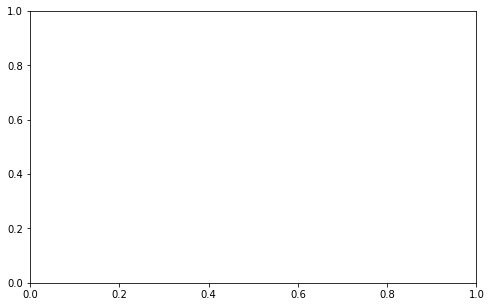

In [166]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
#plt.plot(m_linear.predict(X)[100:400],label=' linear predict ')
plt.plot(m_tpot.predict(X)[100:400],label=' tpot predict ')


plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow model difference',title='FO Flow upscaled')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
#plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()